# Q2

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios:

Use Monte Carlo simulation (with at least 105 data points) to find the minimum-variance frontier generated by the five industry portfolios, without short sales (or riskless asset). 

Plot your results with risk premium on the vertical axis, and standard deviation of (excess) return on the horizontal axis.

Report the mean return and standard deviation of (excess) return for the simulated global-minimum-variance portfolio.

Briefly explain in words, without any mathematical notation or formulas:

Economic significance of indifference curves

Shape of indifference curves for a risk-averse investor

How a risk-averse investor can use indifference curves to find the optimal investment portfolio

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
Industry_Portfolio=pd.read_excel("Exam-Industry.xlsx",index_col=0)
Industry_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92
190102,2.89,4.87,3.45,3.33,2.63
190103,1.89,1.81,-0.83,2.29,-0.86
190104,4.36,2.58,3.16,6.37,1.11
190105,0.92,-2.55,-1.13,1.96,-2.40
...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59
190609,-3.28,-2.84,-6.16,-6.01,-2.26
190610,8.63,6.01,6.74,2.25,7.25


In [3]:
Market_Portfolio=pd.read_excel("Exam–Market.xlsx",index_col=0)
Market_Portfolio

,Market
Date,
190101,1.99
190102,3.49
190103,0.46
190104,2.90
190105,-1.27
...,...
190608,2.91
190609,-4.37
190610,6.65


In [4]:
Summary = pd.DataFrame({"Mean":Industry_Portfolio.mean(),"Std":Industry_Portfolio.std()})
Summary

,Mean,Std
Cnsmr,1.449167,3.114793
Manuf,1.108889,3.935195
HiTec,1.672361,3.787931
Hlth,1.452083,3.601339
Other,1.366389,4.314297


In [5]:
V=Industry_Portfolio.cov()

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

In [6]:
# initialize variables
n_simulations = 100000

In [7]:
# This is using (standard) uniform distribution in the range [0, 1]. 

# Create dataframe to store simulation results
Simulation_df = pd.DataFrame(index=range(n_simulations), 
                             columns=Summary.index)

# Add columns for Return and Std
Simulation_df["Return"] = np.nan
Simulation_df["Std"] = np.nan

# Generate random weights for all simulations and industries at once
random_weights = np.random.uniform(0, 1, (n_simulations, len(Simulation_df.columns) - 2))           # Can change portfolio weight constraint here

# Normalize weights so that the sum of each row equals 1
random_weights = random_weights / random_weights.sum(axis=1, keepdims=True)

# Store weights in the DataFrame (for all rows at once)
Simulation_df.iloc[:, :-2] = random_weights

# Calculate the returns for all simulations at once using a dot product
Simulation_df["Return"] = np.dot(random_weights, Summary["Mean"])

# Calculate the standard deviation (portfolio volatility) for all simulations
Simulation_df["Std"] = np.sqrt(np.einsum('ij,ik,jk->i', random_weights, random_weights, V))

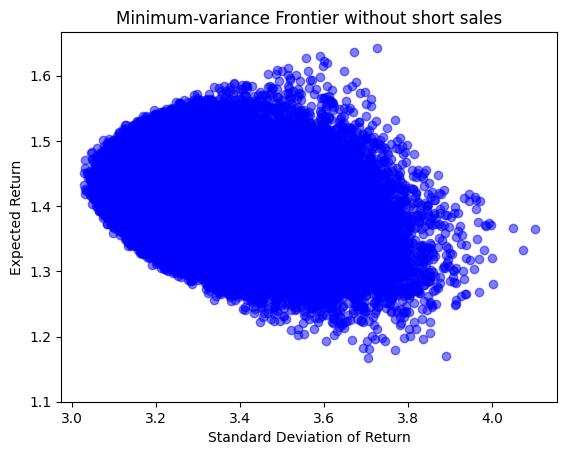

In [11]:
# Scatter plot
plt.scatter(Simulation_df["Std"], Simulation_df["Return"], color='blue',alpha=0.5)

# Set y-axis ticks in increments of 0.1%
plt.yticks(np.arange(1.1, 1.7, 0.1))

# Labeling the axes and setting title
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Minimum-variance Frontier without short sales')

# Show the plot
plt.show()

In [12]:
Simulation_df

,Cnsmr,Manuf,HiTec,Hlth,Other,Return,Std
0,0.230684,0.097566,0.196232,0.117396,0.358122,1.430463,3.434782
1,0.092906,0.277653,0.282736,0.17281,0.173894,1.403902,3.415494
2,0.028857,0.329456,0.034774,0.240002,0.366911,1.315149,3.578664
3,0.023689,0.091072,0.246666,0.263316,0.375257,1.442937,3.495447
4,0.318779,0.032981,0.111516,0.357652,0.179072,1.449054,3.169056
...,...,...,...,...,...,...,...
99995,0.461034,0.05085,0.123353,0.079681,0.285082,1.436029,3.283726
99996,0.223199,0.271197,0.177244,0.057378,0.270982,1.374180,3.473289
99997,0.123359,0.10711,0.45672,0.017779,0.295032,1.490287,3.579824
99998,0.262364,0.255777,0.221785,0.201246,0.058828,1.407350,3.227582


In [13]:
Simulation_df["Std"].idxmin()

2941

In [14]:
Simulation_df.iloc[2941,:]

Cnsmr     0.634956
Manuf     0.069364
HiTec     0.027619
Hlth      0.259079
Other     0.008981
Return     1.43174
Std       3.028925
Name: 2941, dtype: object

The mean return of the simulated global-minimum-variance portfolio is 1.43

The standard deviation of the simulated global-minimum-variance portfolio is 3.028

Economic significance of indifference curves:
Indifference curves represent combinations of goods or outcomes that provide the same level of satisfaction or utility to a consumer or decision-maker. In economics, they are used to illustrate consumer preferences and trade-offs. The concept is applied to various contexts, such as consumption choices, investment decisions, or risk preferences. The shape and position of the curves help to understand how a person values different bundles of goods or levels of risk and return, guiding decision-making based on their utility maximization.

Shape of indifference curves for a risk-averse investor:
For a risk-averse investor, indifference curves typically have a concave shape when plotted against risk and return. This reflects their preference for higher returns but aversion to increased risk. As such, they require a higher potential return to accept additional risk. The shape indicates that a risk-averse individual values security and will only be willing to take on additional risk if adequately compensated with higher expected returns.

How a risk-averse investor can use indifference curves to find the optimal investment portfolio:
A risk-averse investor can use indifference curves to find their optimal investment portfolio by comparing these curves with the efficient frontier of available investment options (which shows the best possible risk-return combinations). The optimal portfolio occurs at the point where the highest indifference curve touches or is tangent to the efficient frontier. This point represents the best trade-off between risk and return for the investor, maximizing their utility given their risk tolerance.